In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.metrics import dtw

from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [3]:
Patient_count = data['Patient'].value_counts(sort=False)

In [4]:
Patient_count

258        522
8889      3682
9578      4184
10158     1240
5804      1272
6175      4064
10418    13120
10591      996
11333     6480
5371      3365
4456      4069
6563      1965
10020     1452
6514      1786
11580     7259
Name: Patient, dtype: int64

In [5]:
Patience_ID = Patient_count.index.values
Patience_num = len(Patience_ID)

In [6]:
Patience_list = []

for i in range(Patience_num):
    Patience = data[data['Patient']==Patience_ID[i]]
    Patience = Patience[Patience['annotation']==1]
    Patience = Patience.iloc[:, 2:].values
    Patience_list.append(Patience)

In [59]:
Patience_scaled_list = []

for i in range(Patience_num):
    Patience_scaled_list.append(StandardScaler().fit_transform(Patience_list[i]))

In [48]:
i = 0
test0 = Patience_list[i]
scaler = TimeSeriesScalerMeanVariance().fit(test0)
test1 = scaler.transform(test0)

In [34]:
i = 0
test0 = Patience_list[i]
test1 = TimeSeriesScalerMeanVariance().fit_transform(test0)

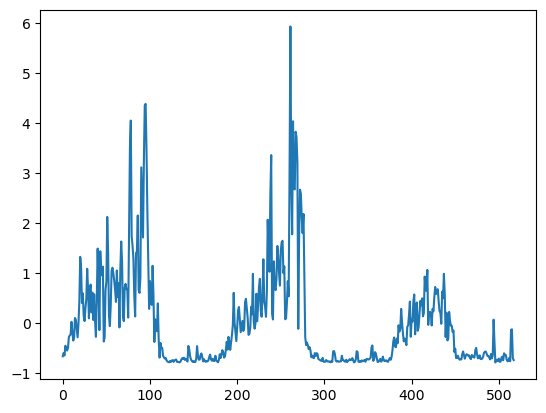

In [60]:
plt.plot((test0[:, 150] - test0[:, 150].mean()) / test0[:, 150].std())

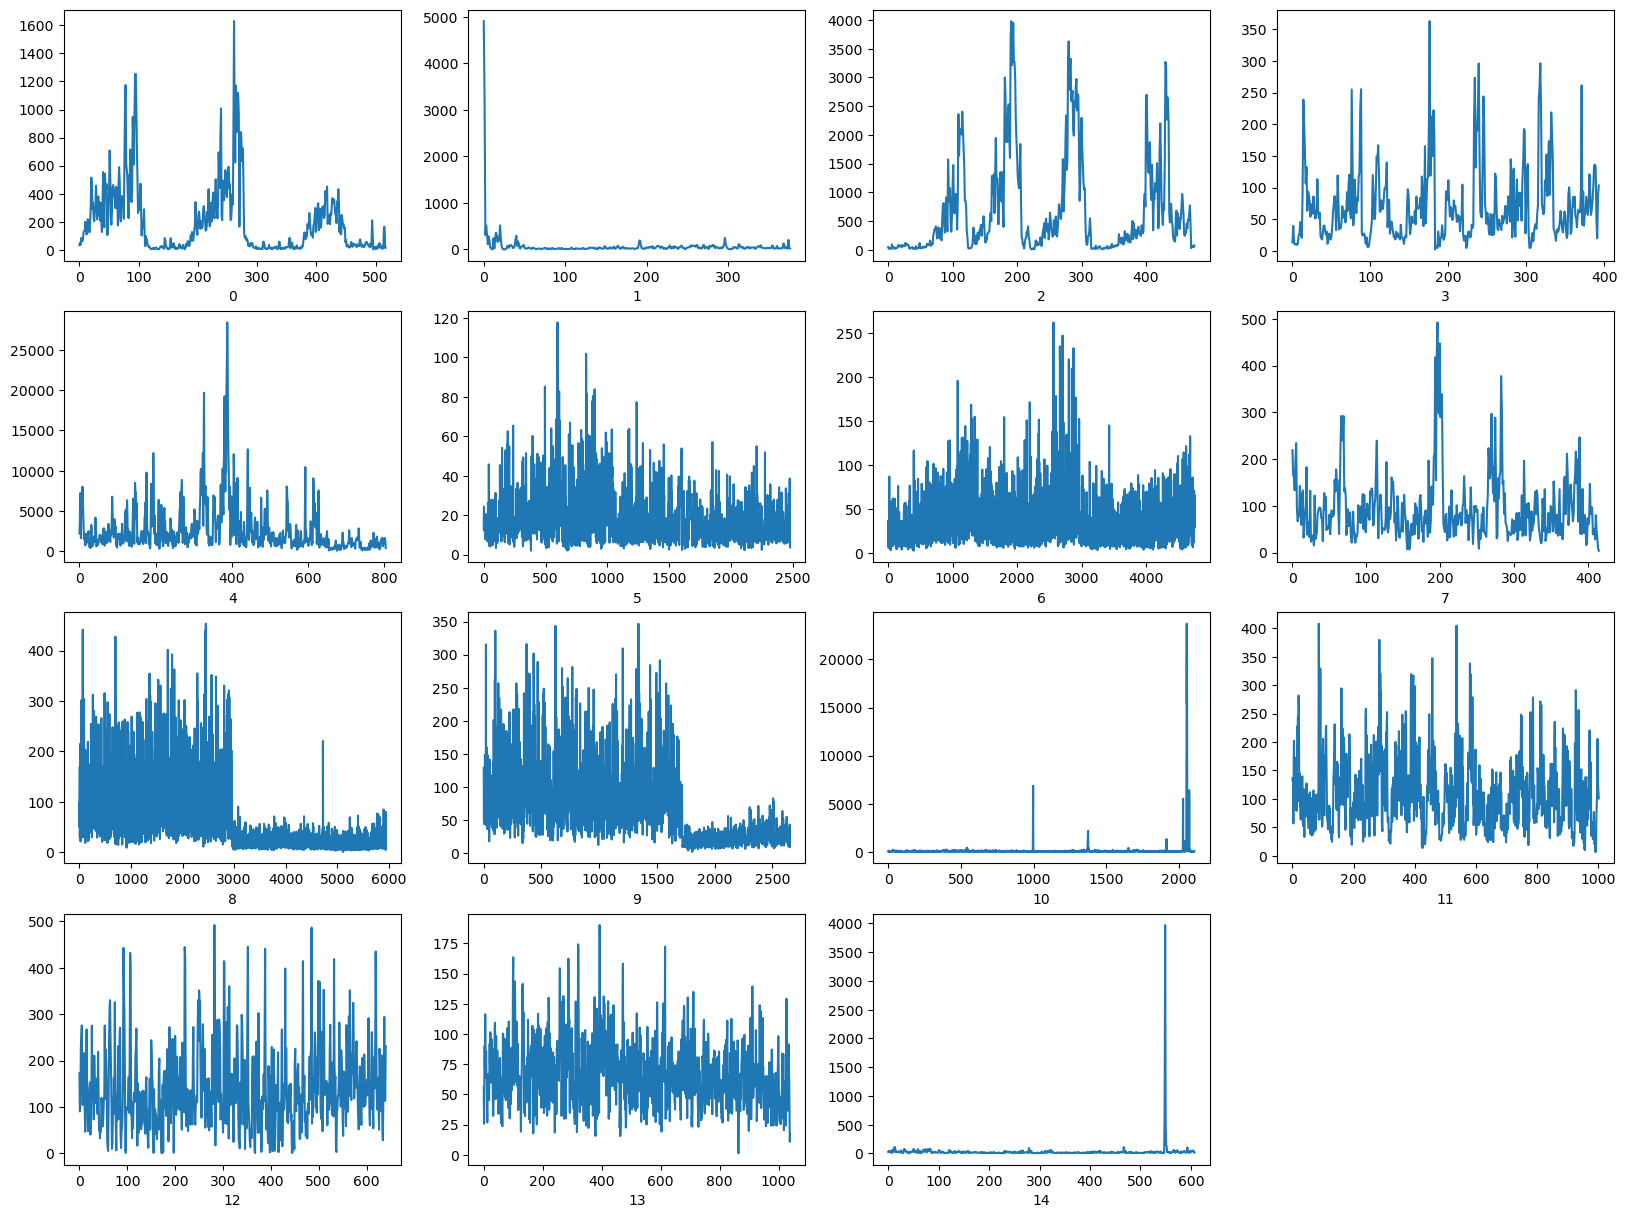

In [91]:

plt.figure(figsize=(20, 15))
for i in range(Patience_num):
    plt.subplot(4, 4, i+1)
    plt.plot(Patience_list[i][:, 150])
    plt.xlabel(str(i))

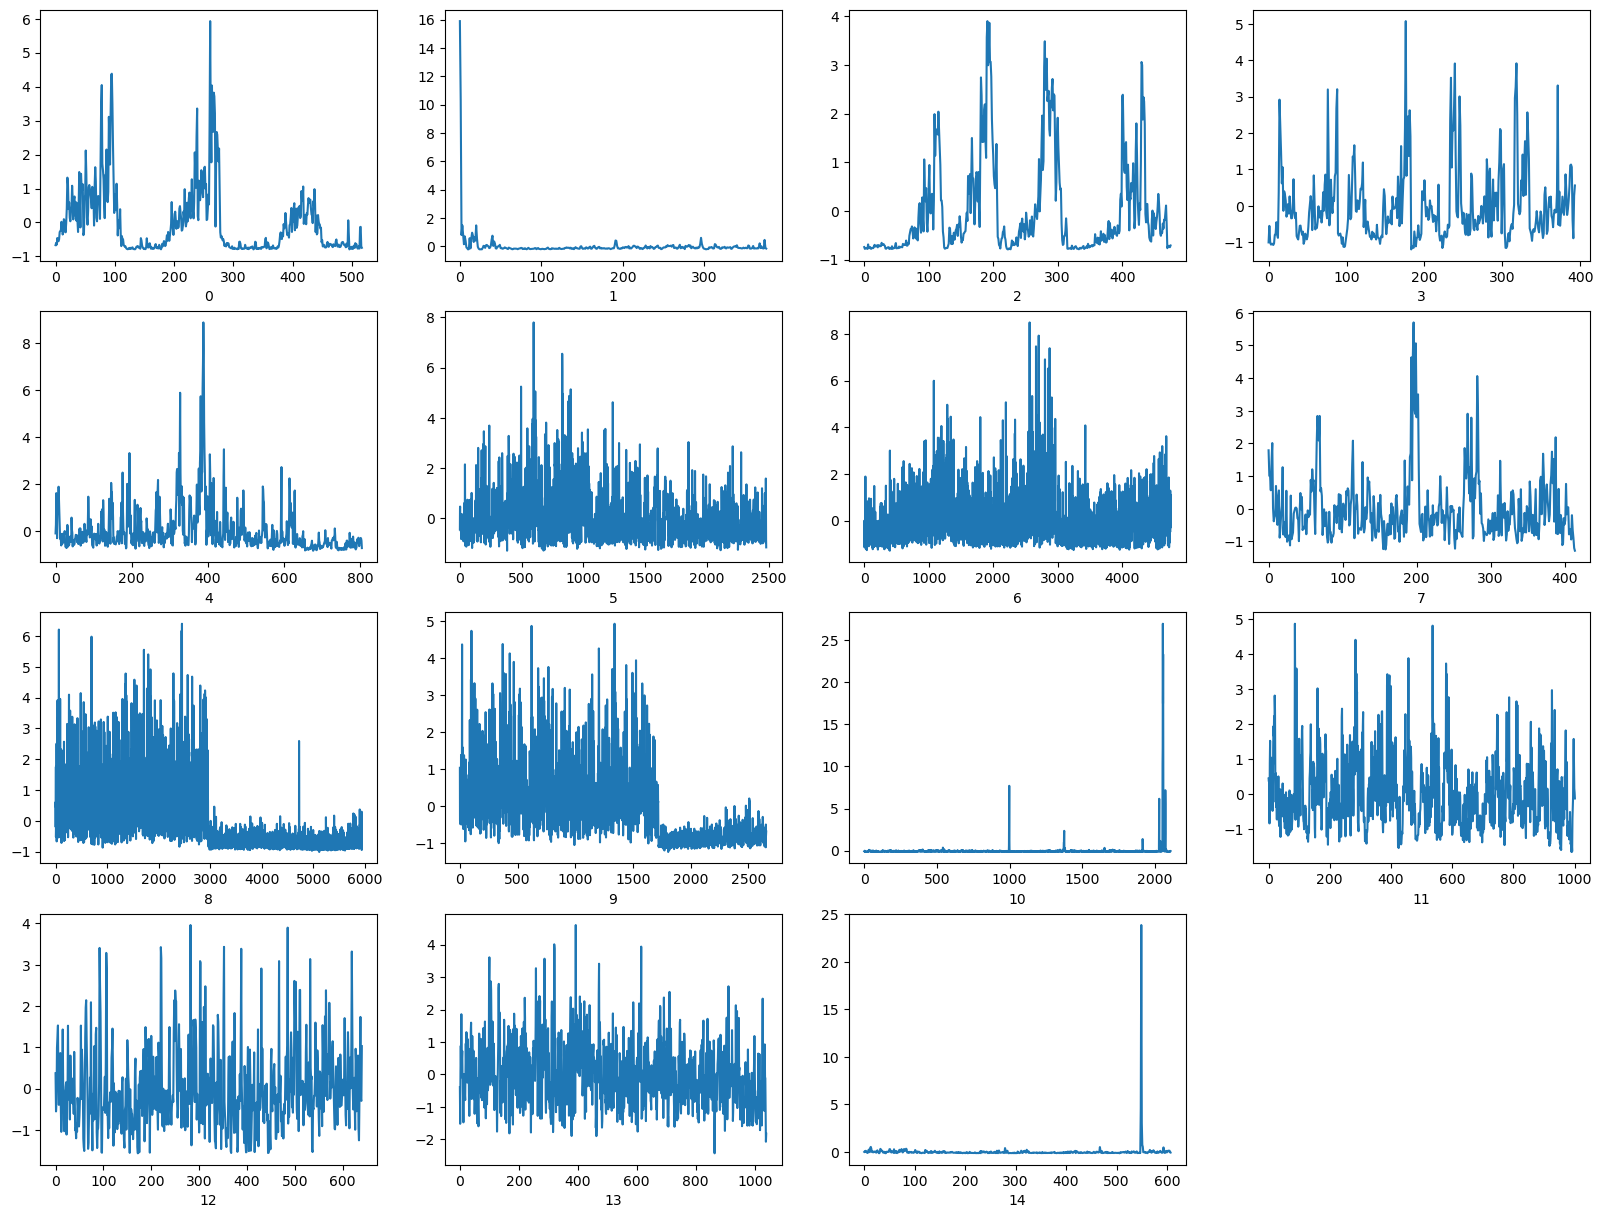

In [90]:
plt.figure(figsize=(20, 15))
for i in range(Patience_num):
    plt.subplot(4, 4, i+1)
    plt.plot(Patience_scaled_list[i][:, 150])
    plt.xlabel(str(i))

<Axes: >

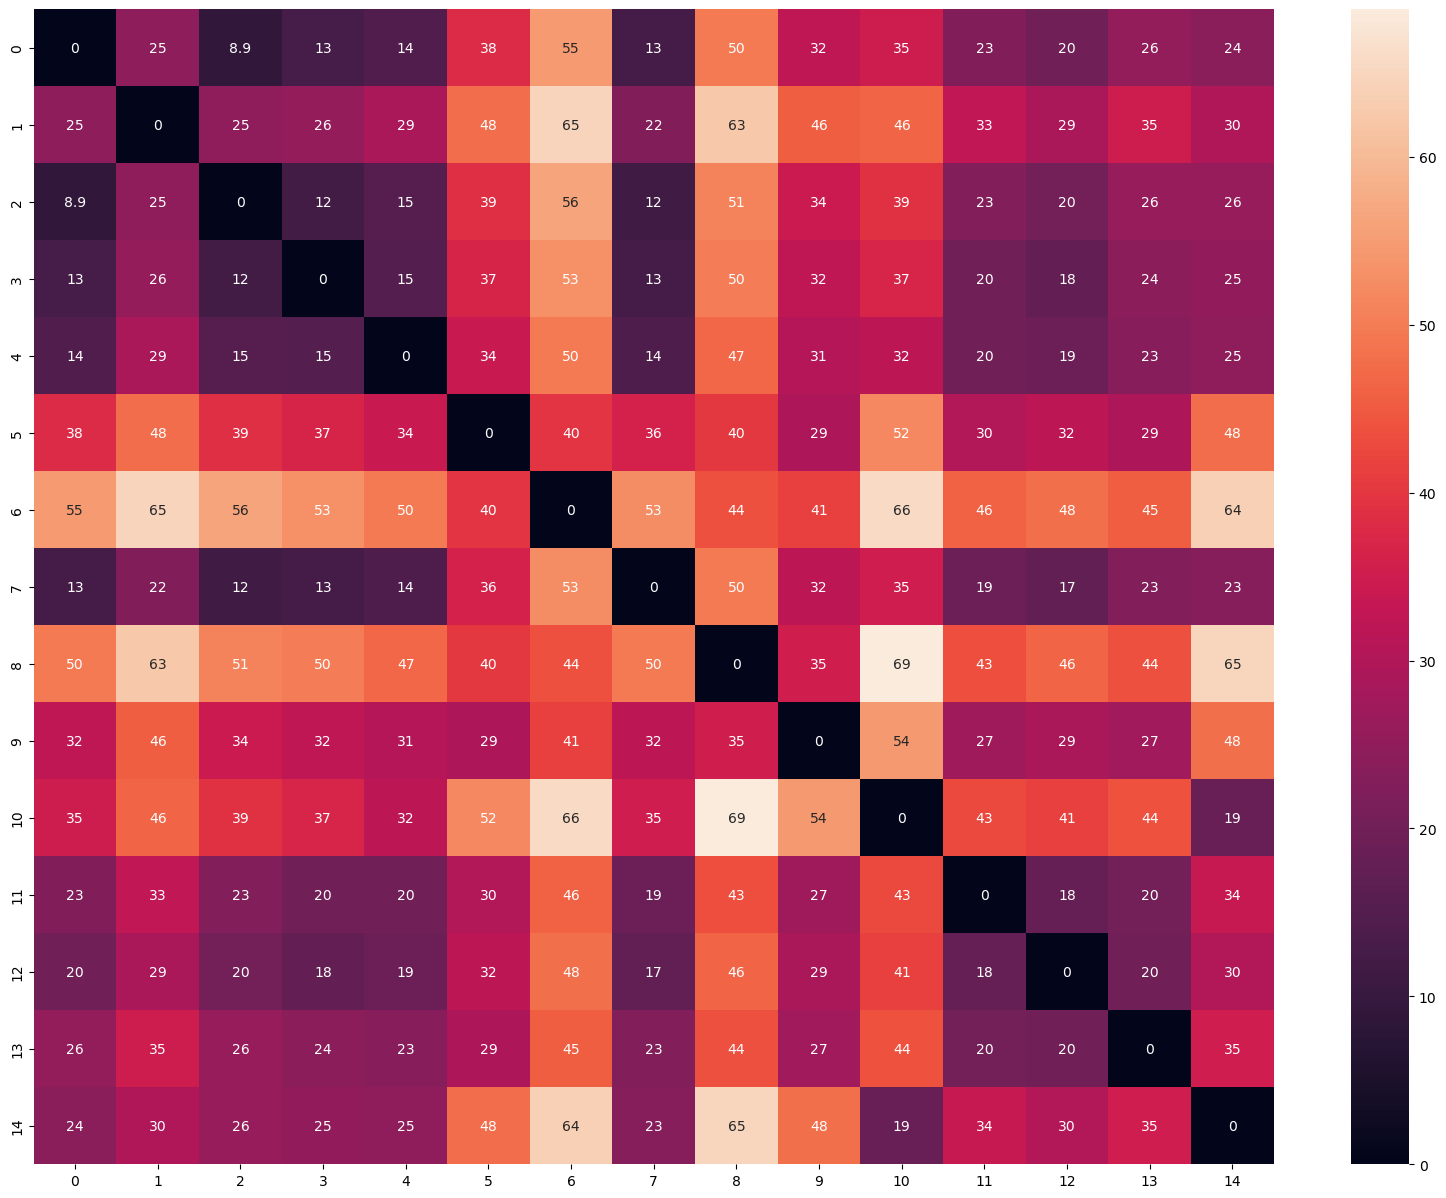

In [119]:
distance = np.zeros([Patience_num, Patience_num])
for i in range(Patience_num):
    for j in range(i, Patience_num):
        distance[i, j] = distance[j, i] = dtw(Patience_scaled_list[i][:, 150], Patience_scaled_list[j][:, 150])
plt.figure(figsize=(20, 15))
sns.heatmap(distance, annot=True)

In [121]:
Patience_scaled_list[0].shape[-1]

360

In [122]:

distance_tensor = []
distance_matrix = np.zeros([Patience_num, Patience_num])

for feature_idx in range(Patience_scaled_list[0].shape[-1]):
    for i in range(Patience_num):
        for j in range(i, Patience_num):
            distance_matrix[i, j] = distance_matrix[j, i] = dtw(Patience_scaled_list[i][:, feature_idx], Patience_scaled_list[j][:, feature_idx])
    distance_tensor.append(distance_matrix)
    
distance_tensor = np.array(distance_tensor)

KeyboardInterrupt: 

In [118]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=3, affinity='precomputed', assign_labels='kmeans', random_state=0)
labels = spectral.fit_predict(distance)

# 打印聚类结果
print("聚类标签：", labels)

d:\Languages\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


聚类标签： [0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
